# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             recall_score, 
                             precision_score, 
                             roc_curve,
                            f1_score,
                            auc,
                             confusion_matrix,
                            ConfusionMatrixDisplay,
                            RocCurveDisplay)
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from perceptron import Perceptron

In [2]:
np.random.seed(10)

# Chargement des features sélectionnées

In [3]:
df = pd.read_csv("forward_selected_features.csv")

In [4]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# Normalisation des données

In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Création d'ensembles d'entraînement et de validation

In [6]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,shuffle=True,random_state=10)

In [7]:
X_train.shape, X_test.shape

((296, 4), (128, 4))

# Entraînement du perceptron

In [8]:
np.random.seed(10)
perceptron = Perceptron()
perceptron.fit(X_train,y_train,n_epochs=100,lr=0.01)

Epoch 100/100

# Evaluation du perceptron

In [9]:
y_pred=perceptron.predict(X_test)

In [10]:
print(f"Accuracy  : {round(100*accuracy_score(y_pred,y_test),2)}%")
print(f"Precision : {round(100*precision_score(y_pred,y_test),2)}%")
print(f"Recall    : {round(100*recall_score(y_pred,y_test),2)}%")
print(f"F1-Score  : {round(100*f1_score(y_pred,y_test),2)}%")

Accuracy  : 96.88%
Precision : 93.44%
Recall    : 100.0%
F1-Score  : 96.61%


# Courbe ROC et matrice de confusion

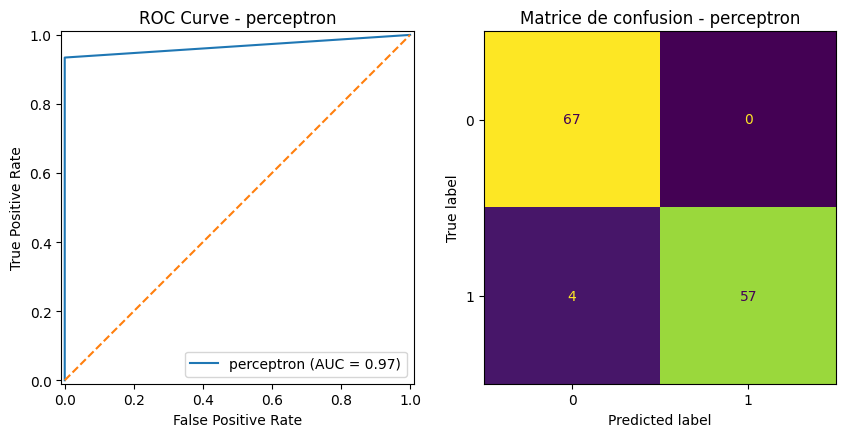

In [11]:
fpr, tpr, rc_aux = roc_curve(y_test,y_pred)
fig, ax = plt.subplots(1,2,figsize=(10,8)) 
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr,
                tpr=tpr, 
                roc_auc=roc_auc,
                estimator_name='perceptron').plot(ax=ax[0]);

ax[0].set_title(f"ROC Curve - perceptron")
ax[0].plot([0,1],[0,1],linestyle="--");

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax[1],colorbar=False)
ax[1].set_title(f"Matrice de confusion - perceptron");
plt.show()

# Visualisation des données

## Projection des individus dans plan

In [12]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
y_pred = perceptron.predict(X_scaled)

## Représentation graphique

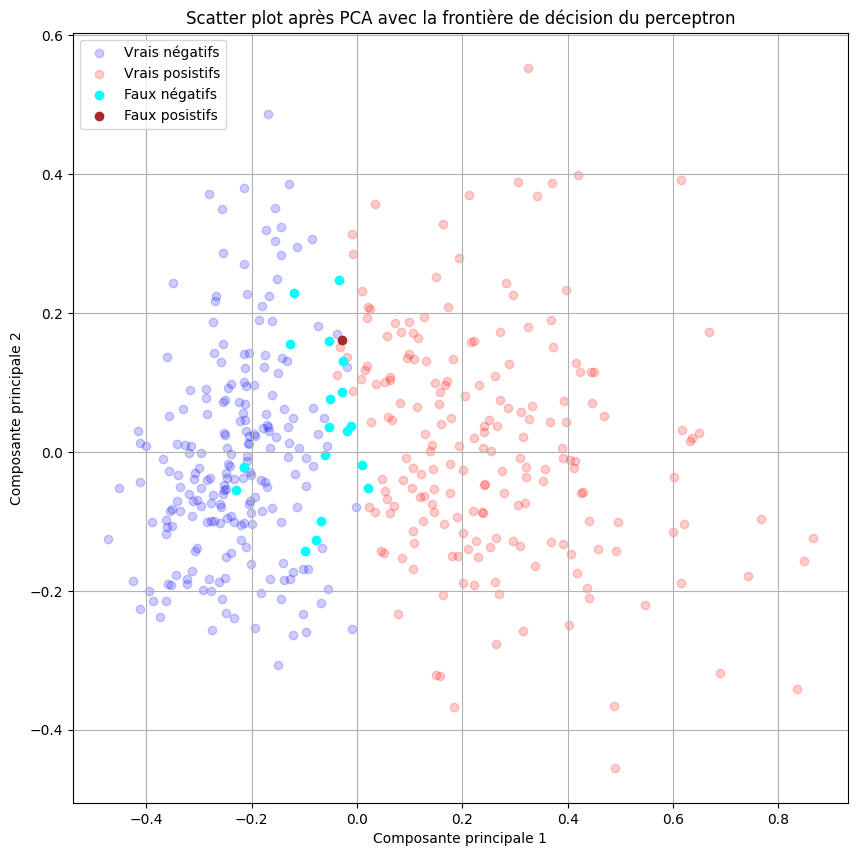

In [13]:
tn = X_reduced[np.where((y == 0) & (y_pred == 0))]
tp = X_reduced[np.where((y == 1) & (y_pred == 1))]
fn = X_reduced[np.where((y == 1) & (y_pred == 0))]
fp = X_reduced[np.where((y == 0) & (y_pred == 1))]

plt.figure(figsize=(10, 10))
plt.scatter(tn[:, 0], tn[:, 1], color='blue', label='Vrais négatifs', alpha=0.2)
plt.scatter(tp[:, 0], tp[:, 1], color='red', label='Vrais posistifs', alpha=0.2)
plt.scatter(fn[:, 0], fn[:, 1], color='cyan', label='Faux négatifs', alpha=1)
plt.scatter(fp[:, 0], fp[:, 1], color='brown', label='Faux posistifs', alpha=1)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Scatter plot après PCA avec la frontière de décision du perceptron')
plt.legend(loc='upper left')
plt.grid()
plt.show()



## Ajout de la frontière de décision

### Calcul de la frontière

In [14]:
x_min, x_max = X_reduced[:, 0].min() - 0.1, X_reduced[:, 0].max() + 0.1
y_min, y_max = X_reduced[:, 1].min() - 0.1, X_reduced[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))


grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_original = pca.inverse_transform(grid_points)

z = perceptron.predict(grid_points_original)
z = z.reshape(xx.shape)



## Représentation graphique

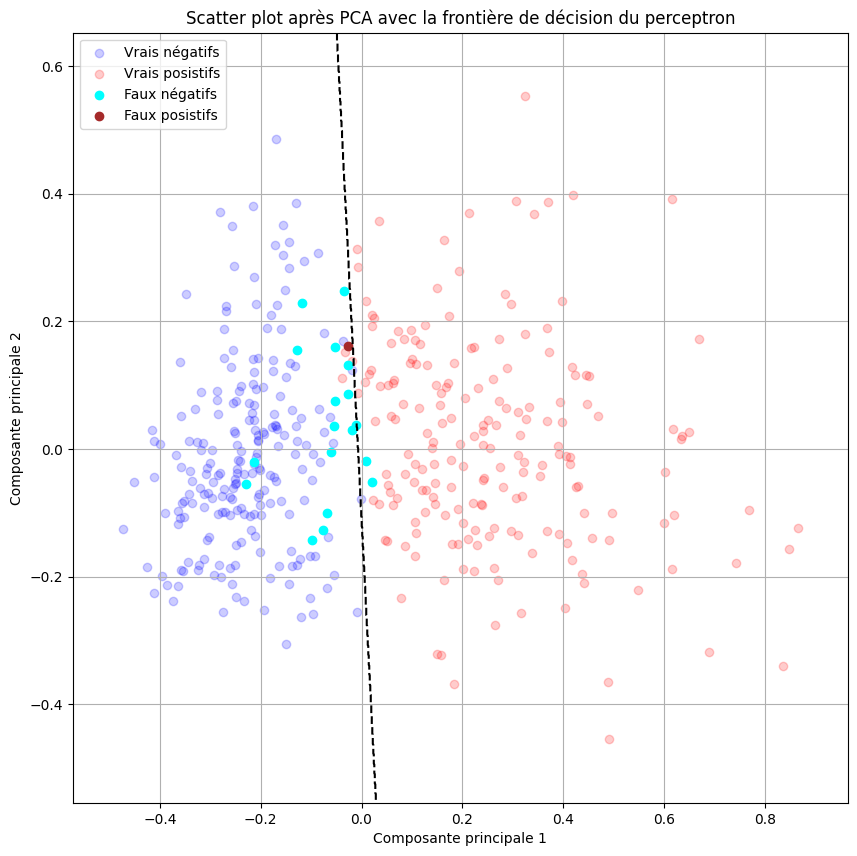

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(tn[:, 0], tn[:, 1], color='blue', label='Vrais négatifs', alpha=0.2)
plt.scatter(tp[:, 0], tp[:, 1], color='red', label='Vrais posistifs', alpha=0.2)
plt.scatter(fn[:, 0], fn[:, 1], color='cyan', label='Faux négatifs', alpha=1)
plt.scatter(fp[:, 0], fp[:, 1], color='brown', label='Faux posistifs', alpha=1)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Scatter plot après PCA avec la frontière de décision du perceptron')
plt.legend(loc='upper left')
plt.grid()
plt.contour(xx, yy, z, levels=[0], colors='k', linestyles='dashed')
plt.show()


# Application à l'ensemble des données

## Chargement des features sélectionnées

In [21]:
df = pd.read_csv("bcw_data.csv",usecols=df.columns)

In [22]:
df["diagnosis"] = df["diagnosis"].map(lambda x: 1 if x == "M" else 0)

In [23]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

## Normalisation des données

In [24]:
X_scaled = scaler.transform(X)

## Prédictions

In [25]:
y_pred = perceptron.predict(X_scaled)

## Scores sur l'ensemble des données

In [27]:
print(f"Accuracy  : {round(100*accuracy_score(y_pred,y),2)}%")
print(f"Precision : {round(100*precision_score(y_pred,y),2)}%")
print(f"Recall    : {round(100*recall_score(y_pred,y),2)}%")
print(f"F1-Score  : {round(100*f1_score(y_pred,y),2)}%")

Accuracy  : 96.66%
Precision : 91.51%
Recall    : 99.49%
F1-Score  : 95.33%
